
<h1>1.Overall Approach of the Analysis</h1>
<b>Problem Statement</b>:

The goal of this analysis is to identify clients who are likely to have payment difficulties based on their application data. This will help in understanding the factors that contribute to payment difficulties and allow for better risk assessment in future loan applications.

<b>Analysis Approach</b>:

<b>Data Loading</b>: Load the three datasets to understand their structure and content.

<b>Missing Data Analysis</b>: Identify and handle missing values in the datasets using appropriate methods.

<b>Outlier Detection</b>: Detect any outliers in the datasets that may skew the analysis.

<b>Data Imbalance Assessment</b>: Analyze the target variable for imbalances and visualize the results.

<b>Exploratory Data Analysis (EDA)</b>: Perform univariate, bivariate, and segmented univariate analyses to uncover patterns and insights.

<b>Correlation Analysis</b>: Identify top correlations related to payment difficulties and interpret their significance in business terms.

<h1>2.Identify Missing Data and Handle It</h1>

<b>Identifying Missing Data</b>: We will summarize the missing data in each dataset and decide on an appropriate strategy for handling it. In EDA, it's essential to decide whether to drop columns, drop rows, or fill missing values with suitable replacements.

<b>Approach</b>:
Columns with a significant percentage of missing values will be dropped.
For numerical columns, missing values will be filled with the median, while categorical columns will be filled with the mode.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load datasets
application_data = pd.read_csv('/content/application_data.csv')
previous_application = pd.read_csv('/content/previous_application.csv')
columns_description = pd.read_csv('/content/columns_description.csv', encoding='latin1')


In [20]:
application_data.shape

(50460, 122)

In [24]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [21]:
previous_application.shape

(102536, 37)

In [25]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [22]:
columns_description.shape

(160, 5)

In [19]:
# Function to summarize missing data
def summarize_missing_data(df):
    missing_data = df.isnull().sum().sort_values(ascending=False)
    missing_percentage = (missing_data / len(df)) * 100
    missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
    return missing_summary[missing_summary['Missing Values'] > 0]

# Identify missing data
application_missing = summarize_missing_data(application_data)
previous_missing = summarize_missing_data(previous_application)

# Handle missing data (example)
application_data_cleaned = application_data.dropna(thresh=0.6 * len(application_data), axis=1)

# Fill missing values separately for numeric and non-numeric columns
numeric_cols = application_data_cleaned.select_dtypes(include=[np.number]).columns
non_numeric_cols = application_data_cleaned.select_dtypes(exclude=[np.number]).columns

application_data_cleaned[numeric_cols] = application_data_cleaned[numeric_cols].fillna(application_data_cleaned[numeric_cols].median())
application_data_cleaned[non_numeric_cols] = application_data_cleaned[non_numeric_cols].fillna(application_data_cleaned[non_numeric_cols].mode().iloc[0])
print("Before Cleaned: ")
print(application_data)
print('*'*40)
print("After Cleaned: ")
print(application_data_cleaned)

Before Cleaned: 
       SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0          100002       1         Cash loans           M            N   
1          100003       0         Cash loans           F            N   
2          100004       0    Revolving loans           M            Y   
3          100006       0         Cash loans           F            N   
4          100007       0         Cash loans           M            N   
...           ...     ...                ...         ...          ...   
50455      158420       0         Cash loans           F            N   
50456      158421       0         Cash loans           F            N   
50457      158422       0         Cash loans           F            Y   
50458      158423       0         Cash loans           F            N   
50459      158424       0         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                   Y             0  

<ipython-input-19-c4bb7c775b4e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_data_cleaned[numeric_cols] = application_data_cleaned[numeric_cols].fillna(application_data_cleaned[numeric_cols].median())
<ipython-input-19-c4bb7c775b4e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_data_cleaned[non_numeric_cols] = application_data_cleaned[non_numeric_cols].fillna(application_data_cleaned[non_numeric_cols].mode().iloc[0])


<h1>3.Identify Outliers in the Dataset</h1>

<b>Identifying Outliers</b>:

Outliers are data points that significantly differ from other observations. They can indicate variability in the measurements or may be errors.

<b>Approach</b>:

Use the Interquartile Range (IQR) method to detect outliers in the dataset.

In [13]:
# Outlier detection
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Example: Detect outliers in 'AMT_INCOME_TOTAL'
outliers_income = detect_outliers(application_data_cleaned, 'AMT_INCOME_TOTAL')
print(f'Outliers in AMT_INCOME_TOTAL:\n{outliers_income}')


Outliers in AMT_INCOME_TOTAL:
       SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
7          100010       0         Cash loans           M            Y   
22         100026       0         Cash loans           F            N   
33         100039       0         Cash loans           M            Y   
49         100056       0         Cash loans           M            Y   
51         100059       0         Cash loans           M            Y   
...           ...     ...                ...         ...          ...   
50398      158351       0         Cash loans           M            Y   
50415      158376       0         Cash loans           M            Y   
50422      158383       0         Cash loans           F            Y   
50434      158398       0    Revolving loans           M            Y   
50440      158404       0         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
7                   Y   

<h1>4.Identify Data Imbalance</h1>

<b>Data Imbalance</b>:

Data imbalance occurs when the distribution of classes is not uniform. In this case, we will analyze the target variable, which indicates whether clients have payment difficulties.

<b>Approach</b>:

Calculate the ratio of each class in the target variable.
Use various plots (bar plots, pie charts) to visualize the imbalance.

<ipython-input-32-15fc275ef11f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='coolwarm')


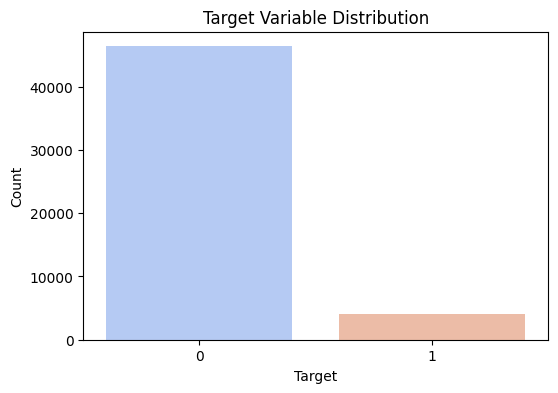

Data imbalance ratio:
TARGET
0    0.919263
1    0.080737
Name: proportion, dtype: float64


In [32]:
# Analyze data imbalance
def plot_target_distribution(df, target_col):
    target_counts = df[target_col].value_counts()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=target_counts.index, y=target_counts.values, palette='coolwarm')
    plt.title('Target Variable Distribution')
    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.show()

# Plot target distribution
plot_target_distribution(application_data_cleaned, 'TARGET')

# Calculate the ratio of data imbalance
target_counts = application_data_cleaned['TARGET'].value_counts(normalize=True)
print(f"Data imbalance ratio:\n{target_counts}")


<h1>5.Results of Univariate, Segmented Univariate, and Bivariate Analysis</h1>

<b>Univariate Analysis</b>:

This analysis involves examining each variable individually to understand its distribution.

<b>Segmented Univariate Analysis</b>:

This analysis examines variables while segmenting based on the target variable to see how distributions differ.

<b>Bivariate Analysis</b>:

This involves examining the relationship between two variables, particularly between features and the target variable.

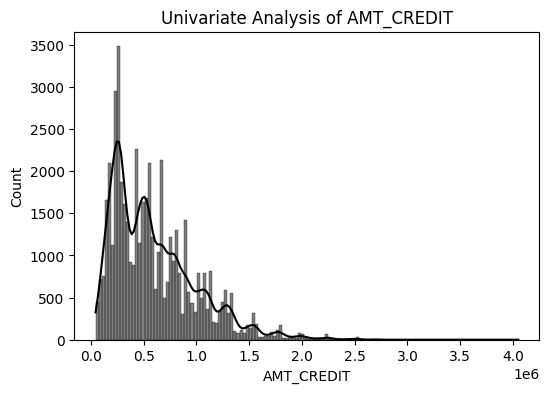

*************************************************************************


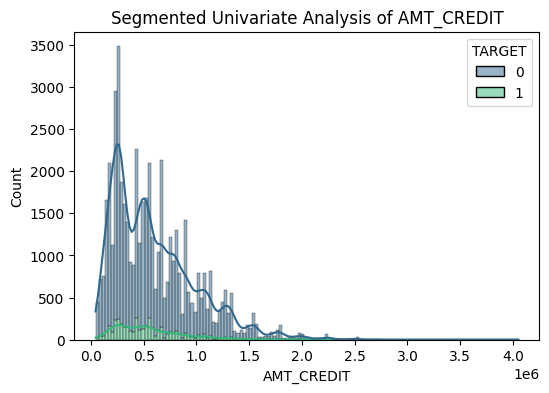

*************************************************************************


<ipython-input-34-314e856f4e3c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='viridis')


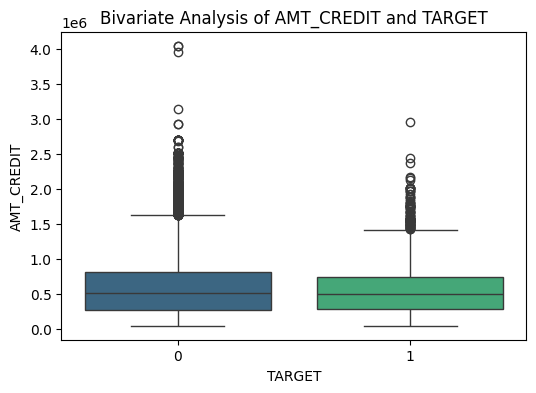

In [34]:
# Univariate analysis
def univariate_analysis(df, col):
    plt.figure(figsize=(6, 4))
    if df[col].dtype == 'object':
        sns.countplot(y=col, data=df, palette='viridis')
    else:
        sns.histplot(df[col].dropna(), kde=True, color='black')
    plt.title(f'Univariate Analysis of {col}')
    plt.show()

# Example: Analyze 'AMT_CREDIT'
univariate_analysis(application_data_cleaned, 'AMT_CREDIT')
print('*************************************************************************')
# Segmented univariate analysis
def segmented_univariate_analysis(df, col, target):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue=target, kde=True, palette='viridis', multiple='stack')
    plt.title(f'Segmented Univariate Analysis of {col}')
    plt.show()

# Example: Segmented univariate analysis for 'AMT_CREDIT'
segmented_univariate_analysis(application_data_cleaned, 'AMT_CREDIT', 'TARGET')
print('*************************************************************************')
# Bivariate analysis
def bivariate_analysis(df, feature, target):
    plt.figure(figsize=(6, 4))
    if df[feature].dtype == 'object':
        sns.barplot(x=feature, y=target, data=df, palette='viridis')
    else:
        sns.boxplot(x=target, y=feature, data=df, palette='viridis')
    plt.title(f'Bivariate Analysis of {feature} and {target}')
    plt.show()

# Example: Analyze 'AMT_CREDIT' vs 'TARGET'
bivariate_analysis(application_data_cleaned, 'AMT_CREDIT', 'TARGET')


<b>Business Interpretation</b>:

1.Univariate analysis can reveal distributions of income or credit amounts.

2.Segmented univariate analysis can show how these distributions differ between clients with and without payment difficulties.

3.Bivariate analysis highlights relationships between features (like credit amount) and the likelihood of payment difficulties.

<h1>6.Top 10 Correlations for Clients with Payment Difficulties</h1>

<b>Correlation Analysis</b>:

We will find the top 10 correlations among features, excluding the target variable.

<b>Approach</b>:

1.Compute the correlation matrix.

2.Identify top correlations for the segmented data based on the target variable.

<ipython-input-36-9a9bbad1b2a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = pd.to_numeric(df[target_col], errors='coerce')
<ipython-input-36-9a9bbad1b2a9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[target_col], inplace=True)


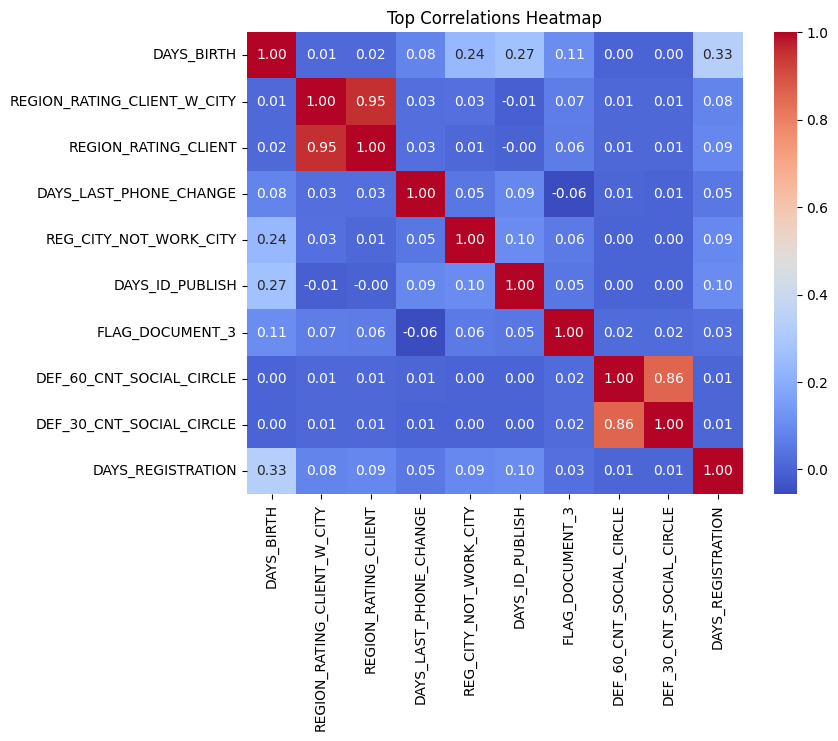

DAYS_BIRTH                     0.076242
REGION_RATING_CLIENT_W_CITY    0.067502
REGION_RATING_CLIENT           0.066815
DAYS_LAST_PHONE_CHANGE         0.056603
REG_CITY_NOT_WORK_CITY         0.049270
DAYS_ID_PUBLISH                0.046179
FLAG_DOCUMENT_3                0.045362
DEF_60_CNT_SOCIAL_CIRCLE       0.044794
DEF_30_CNT_SOCIAL_CIRCLE       0.042498
DAYS_REGISTRATION              0.042200
Name: TARGET, dtype: float64


In [36]:
# Correlation analysis
def correlation_analysis(df, target_col):
    # Ensure target exists
    if target_col not in df.columns:
        raise ValueError(f"{target_col} is not in the DataFrame")

    # Ensure 'TARGET' is numeric
    df[target_col] = pd.to_numeric(df[target_col], errors='coerce')

    # Drop rows with NaN values in 'TARGET' after conversion
    df.dropna(subset=[target_col], inplace=True)

    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    if target_col not in numeric_df.columns:
        raise ValueError(f"{target_col} must be a numeric column for correlation analysis.")

    correlation_matrix = numeric_df.corr()
    target_correlations = correlation_matrix[target_col].drop(target_col).sort_values(ascending=False)
    top_correlations = target_correlations.head(10)

    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df[top_correlations.index].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Top Correlations Heatmap')
    plt.show()

    return top_correlations

# Analyze correlations
correlation_results = correlation_analysis(application_data_cleaned, 'TARGET')
print(correlation_results)

<b>Business Insights from Correlation Analysis</b>:

1.Identifying which features correlate most strongly with the likelihood of payment difficulties helps in risk assessment and understanding the client's financial behavior.

2.Features with high positive or negative correlations may be used to adjust lending criteria or improve the loan approval process.


<h1>7.Conclusion</h1>

The analysis of client loan data revealed key insights into factors influencing payment difficulties. Missing data were addressed, outliers identified, and data imbalances assessed. Exploratory analyses uncovered significant relationships among variables, while correlation analysis highlighted critical predictors for payment difficulties, aiding in better risk assessment and decision-making in lending practices.